<a href="https://colab.research.google.com/github/iramos02/bio108tutorial/blob/main/HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the IUCN Red List to map threats to terrestrial vertebrates at global scale

Harfoot, M.B.J., Johnston, A., Balmford, A. et al. Using the IUCN Red List to map threats to terrestrial vertebrates at global scale. Nat Ecol Evol 5, 1510–1519 (2021). https://doi.org/10.1038/s41559-021-01542-9

**Main Questions:**

What is the spatial intensity of threats and how does it affect species?
What is the spatial summary of different types of threats to species globally?

Specifically the main threats they investigate are -- agriculture, hunting and trapping, logging, pollution, invasive species (including pathogens such as chytrid), and climate change

The species they look at are terrestrial amphibians, bird, and mammals.

**Hypothesis:**

The authors don't state a distinct hypothesis but rather say they hope to fill knowledge gaps of the spatial intensity of threats and how it affects species. Implied hypothesis is perhaps that different types of threats are not evenly distributed globally and also "existing representations of pressures may not adequately capture impacts on ecosystems and species"

**Findings:**

Agriculture and logging are most common in the tropics and hunting and trapping is the most geographically widespread threat to mammals and birds.

Human threats to ecosystems are vastly underestimated, especially in high biodiversity areas.

Sumatra, Borneo, and Madagascar, are highly impacted by all threats across all taxa.

Across all taxa, agriculture was the threat most impacting species, followed by hunting/trapping and logging.


This article uses (one of) the datasets I'm using for my final project: Looking at the species richness of birds globally using data from the IUCN. However, they look at threats to these species and how much they are impacted by each threat.




# Objectives:

My objective is to visualize trends global bird biodiversity using data from the IUCN

Particularly, I'm interested in identifying 'hotspots' for bird biodiversity as well as identifying which parts of the world have more threatened species than others.

I may also be interested in looking at trends between bird biodiversity and factors such as precipitation, elevation, and temperature.




# Analytical Approach

I'm plan on using raster data to do visualizations of global bird biodiversity trends.

Specifically, I'm interested in creating interactive maps to plot trends in all bird species richness as well as threatened bird species richness.

I'm also interested in mapping the ratio of threatened/all bird species visually to identify parts of the world that may be of particular concern for bird biodiversity.

# Install Necessary Packages


! pip install rasterio fiona

! pip install fiona

! pip install folium matplotlib mapclassify

! pip install localtileserver

! pip install rasterio

! pip install leafmap

In [5]:
##import packages here
! pip install rasterio fiona

! pip install fiona

! pip install folium matplotlib mapclassify

! pip install localtileserver

! pip install rasterio

! pip install leafmap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.4/534.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.8 MB/s eta 0:00:00


**Import all other necessary packages**

import rasterio

import rasterio.plot

import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt

from osgeo import gdal

import matplotlib.pyplot as plt

import leafmap

In [6]:
##import the rest of the packages here
import rasterio

import rasterio.plot

import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt

from osgeo import gdal

import matplotlib.pyplot as plt

import leafmap

In [7]:
##reading in first raster data for all bird species data
raster_path1 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif"
)
src1 = rasterio.open(raster_path1)
print(src1)

<open DatasetReader name='https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif' mode='r'>


In [8]:
##reading in second raster data for threatened bird species
raster_path2 = (
    "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif"
)
src2 = rasterio.open(raster_path2)
print(src2)

<open DatasetReader name='https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif' mode='r'>


In [ ]:
# Create an interactive map for all bird species richness 2024
m = leafmap.Map(center=[0, 0], zoom=2)  # Adjust center and zoom as needed

# Loading in raster for all bird species
raster1 = "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_SR_2024.tif"


# Add colormap
m.add_raster(raster1, colormap="viridis", layer_name="All Species Richness")


# Display the map
m

Map(center=[-2.5212259999999986, 0.07656999999997538], controls=(ZoomControl(options=['position', 'zoom_in_tex…

In [ ]:
# Creating an interactive map for threatened species
m = leafmap.Map(center=[0, 0], zoom=2) #you can adjust center and zoom

# Load in raster for threatened species
raster2 = "https://github.com/iramos02/bio108tutorial/raw/refs/heads/main/Birds_THR_SR_2024.tif"

m.add_raster(raster2, colormap="magma", layer_name="Threatened Species Richness")

m

Map(center=[-2.5212259999999986, 0.07656999999997538], controls=(ZoomControl(options=['position', 'zoom_in_tex…

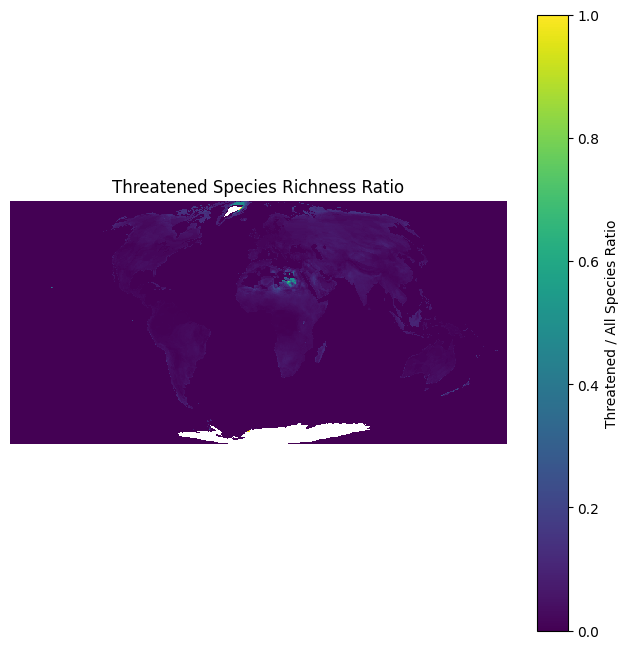

In [12]:
### visualizing threatened/all species ratio on a map
all_species = src1.read(1)
threatened_species = src2.read(1)
species_ratio = np.where(all_species > 0, threatened_species / all_species, np.nan) ##make ratio for threatened/all species, only if all species is greater than 0 and ignoring cells with no data
species_ratio = np.clip(species_ratio, 0, 1) ## all ratios should be between 0 and 1

##plot figure
plt.figure(figsize=(8, 8))
plt.imshow(species_ratio, cmap="viridis", interpolation="nearest", vmin=0, vmax= 1) ##set color map and minimum and maximum
plt.colorbar(label="Threatened / All Species Ratio")
plt.title("Threatened Species Richness Ratio")
plt.axis("off")
plt.show()